In [8]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import warnings

%matplotlib inline

# warningを非表示
warnings.filterwarnings('ignore')

In [11]:
#利用履歴
uselog = pd.read_csv('./chapter03/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [18]:
#会員データ
customer = pd.read_csv('./chapter03/customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [20]:
customer.describe(include = 'O')

,customer_id,name,class,gender,start_date,end_date,campaign_id
count,4192,4192,4192,4192,4192,1350,4192
unique,4192,5,3,2,215,12,3
top,OA832399,XXXXX,C01,M,2017-12-01 00:00:00,2019-02-28 00:00:00,CA1
freq,1,1460,2045,2209,160,149,3050


In [14]:
#会員区分
class_master = pd.read_csv('./chapter03/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [15]:
#キャンペーン区分
campaign = pd.read_csv('./chapter03/campaign_master.csv')
print(len(campaign))
campaign.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [21]:
customer_join = pd.merge(customer,class_master,on='class',how='left')
customer_join = pd.merge(customer_join,campaign,on='campaign_id',how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [23]:
customer_join.groupby('class_name').count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [24]:
customer_join.groupby('campaign_name').count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [27]:
customer_join.groupby(['gender']) .count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [35]:
customer_join.pivot_table(index=['class_name',],columns='campaign_name',values='customer_id',aggfunc='count')

campaign_name,入会費半額,入会費無料,通常
class_name,,,
オールタイム,338,240,1467
デイタイム,147,128,744
ナイト,165,124,839


In [39]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331"))| customer_join["end_date"].isna()]
print(len(customer_newer))
customer_newer.head()

2953


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,ナイト,6000,通常


In [102]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

In [42]:
customer_newer.groupby('class_name').count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [53]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["yymm"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_manths = uselog.groupby(["yymm","customer_id"],as_index=False).count()
del uselog_manths["usedate"]
uselog_manths.rename(columns={"log_id":"count"},inplace=True)

In [57]:
uselog_manths.head()
#uselog_manths.describe()

,yymm,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [59]:
uselog_customer = uselog_manths.groupby("customer_id").agg(["mean","median","max","min"])["count"].reset_index(drop=False)

In [61]:
uselog_customer.head(10)

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
5,AS015315,4.833333,5.0,7,3
6,AS015739,5.583333,5.5,8,4
7,AS015746,2.600000,3.0,4,1
8,AS019120,5.333333,5.0,8,3
9,AS019860,6.083333,6.0,9,4


In [72]:
uselog.head()

,log_id,customer_id,usedate,yymm,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [75]:
#月/曜日別に集計する（顧客に定期利用フラグを付与する

uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","yymm","weekday"],as_index=False).count()[["customer_id","yymm","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"},inplace=True)

In [76]:
uselog_weekday.head()

,customer_id,yymm,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [82]:
uselog_routine = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id","count"]]

uselog_routine["routine_flg"]=0
uselog_routine["routine_flg"].where(uselog_routine["count"]<4,1,inplace=True)

In [83]:
uselog_routine.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [87]:
customer_join = pd.merge(customer_join,uselog_customer,on="customer_id",how="left")
customer_join = pd.merge(customer_join,uselog_routine[["customer_id","routine_flg"]],on="customer_id",how="left")

In [89]:
customer_join.head(1)
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [98]:
from dateutil.relativedelta import relativedelta

customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

In [105]:
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    # start_dateっていつdatetimeに変換したっけ・・・？
    delta = relativedelta(customer_join["calc_date"].iloc[i],customer_join["start_date"].iloc[i])
    # 多機能すぎるloc i番目の "membership_period"列
    customer_join.loc[i,"membership_period"] = delta.years * 12 + delta.months

In [106]:
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47


In [108]:
customer_join[["mean","median","max","min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [109]:
%matplotlib inline

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

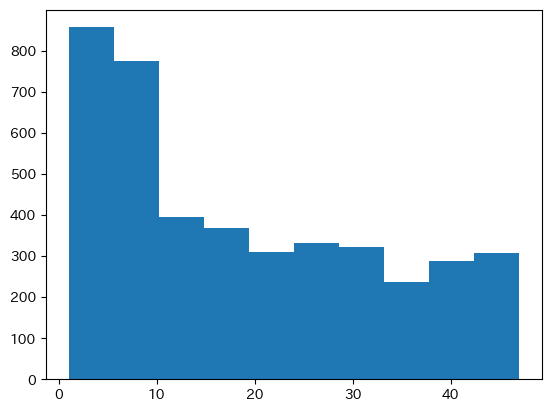

In [110]:
plt.hist(customer_join["membership_period"])